In [1]:
!pip install datasets seqeval -q
!pip install evaluate -q

In [2]:
from datasets import load_dataset 

dataset = load_dataset("/kaggle/usr/lib/layoutlmv3_py/layoutlmv3_py.py")

The repository for layoutlmv3_py contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/layoutlmv3_py.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Generating train split: 0 examples [00:00, ? examples/s]

{'id': 1, 'file_name': '7b99d18e-INV-98_Monika.jpg', 'tokens': ['Invoice', '#:', 'INV-98', 'Invoice', 'Date:', '16', 'Jan', '2024', 'Due', 'Date:', '16', 'Jan', '2024', 'Total', '~4,627.00', '1', 'Acne-UV', 'Gel', 'spf', '50', '(50', 'gm)', '620.34', '1', 'PAC', '620.34', '111.66', '(18%)', '732.00', 'e', 'g', '775.42', '(-20%', ';', ',', '°', ';', '2', 'Keraglo-', 'AD', 'shampoo', '2o129', '1', 'UNT', '237.29', '42.71', '(18%)', '280.00', '9', 'P', '296.61', '(-20%', ';', ';', '.', ',', '3', 'Bioderma', 'Pigmentbio', 'C-concentrate', '2363.64', '1PCS', '2,363.64', '425.46', '(18%)', '2,789.10', 'go', '2,626.27', '(-10%', 'WSs', ';', '°', 'ioe', 'Cetaphil', 'gentle', 'cleansing', 'lotion', '250', '458.64', '°', '4', 'ML', '521.19', '(-12%', '1', '458.64', '82.56', '(18%)', '541.20', '5', 'Anaboom', 'AD', 'Lotion', '50', 'ml', '201.63', '1', 'BTL', '241.63', '43.49', '(18%)', '285.12', '274.58', '(-12%', ',', ':', '°', '.', 'CGST', '9.0%', '%352.94', 'SGST', '9.0%', '%352.94'], 'bboxes'

Generating test split: 0 examples [00:00, ? examples/s]

{'id': 6, 'file_name': '2c43b18d-s2.jpg', 'tokens': ['Invoice', '#:', 'INV-103', 'Involen', 'Dato:', '27', 'Jan', '2024', 'Due', 'Date:', '27', 'Jan', '2074', 'Total', '1,111.00', '+', 'Arachitol', 'Nano', '(60k)', '4°5m!', 'ate', '3', 'BTL', '898.73', '107.85', '(12%)', '1,006.58', '340.43', '(-12%)', '‘', '.', 'h', '.', '2', 'Neurobion', 'Forte', '30', 'tablets', 'oe', '3', 'STRP', '88.60', '15.95', '(18%)', '104,55', '34.75', '(-15%)', '‘', ',', '‘', 'CGST', '6.0%', '€53,.92', 'SGST', '6.0%', '‘', '%53.92', 'CGST', '9.0%', '.', '%7.97', 'SGST', '9.0%', '%7.97'], 'bboxes': [[67, 436, 170, 461], [179, 436, 205, 459], [214, 430, 344, 457], [705, 423, 810, 449], [819, 422, 896, 447], [907, 420, 944, 446], [954, 418, 1012, 445], [1024, 416, 1108, 444], [1354, 419, 1412, 442], [1422, 418, 1498, 442], [1510, 416, 1547, 442], [1560, 414, 1616, 442], [1631, 414, 1712, 441], [1489, 1300, 1588, 1350], [1813, 1303, 2007, 1342], [75, 854, 86, 876], [157, 848, 289, 875], [299, 849, 379, 873], [38

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 9
    })
    test: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 6
    })
})

In [4]:
dataset['train'].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['invoice_no', 'invoice_date', 'due_date', 'total_amount', 'item', 'gst'], id=None), length=-1, id=None),
 'image_path': Value(dtype='string', id=None),
 'image': Image(mode=None, decode=True, id=None)}

In [5]:
dataset['train'].column_names

['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image']

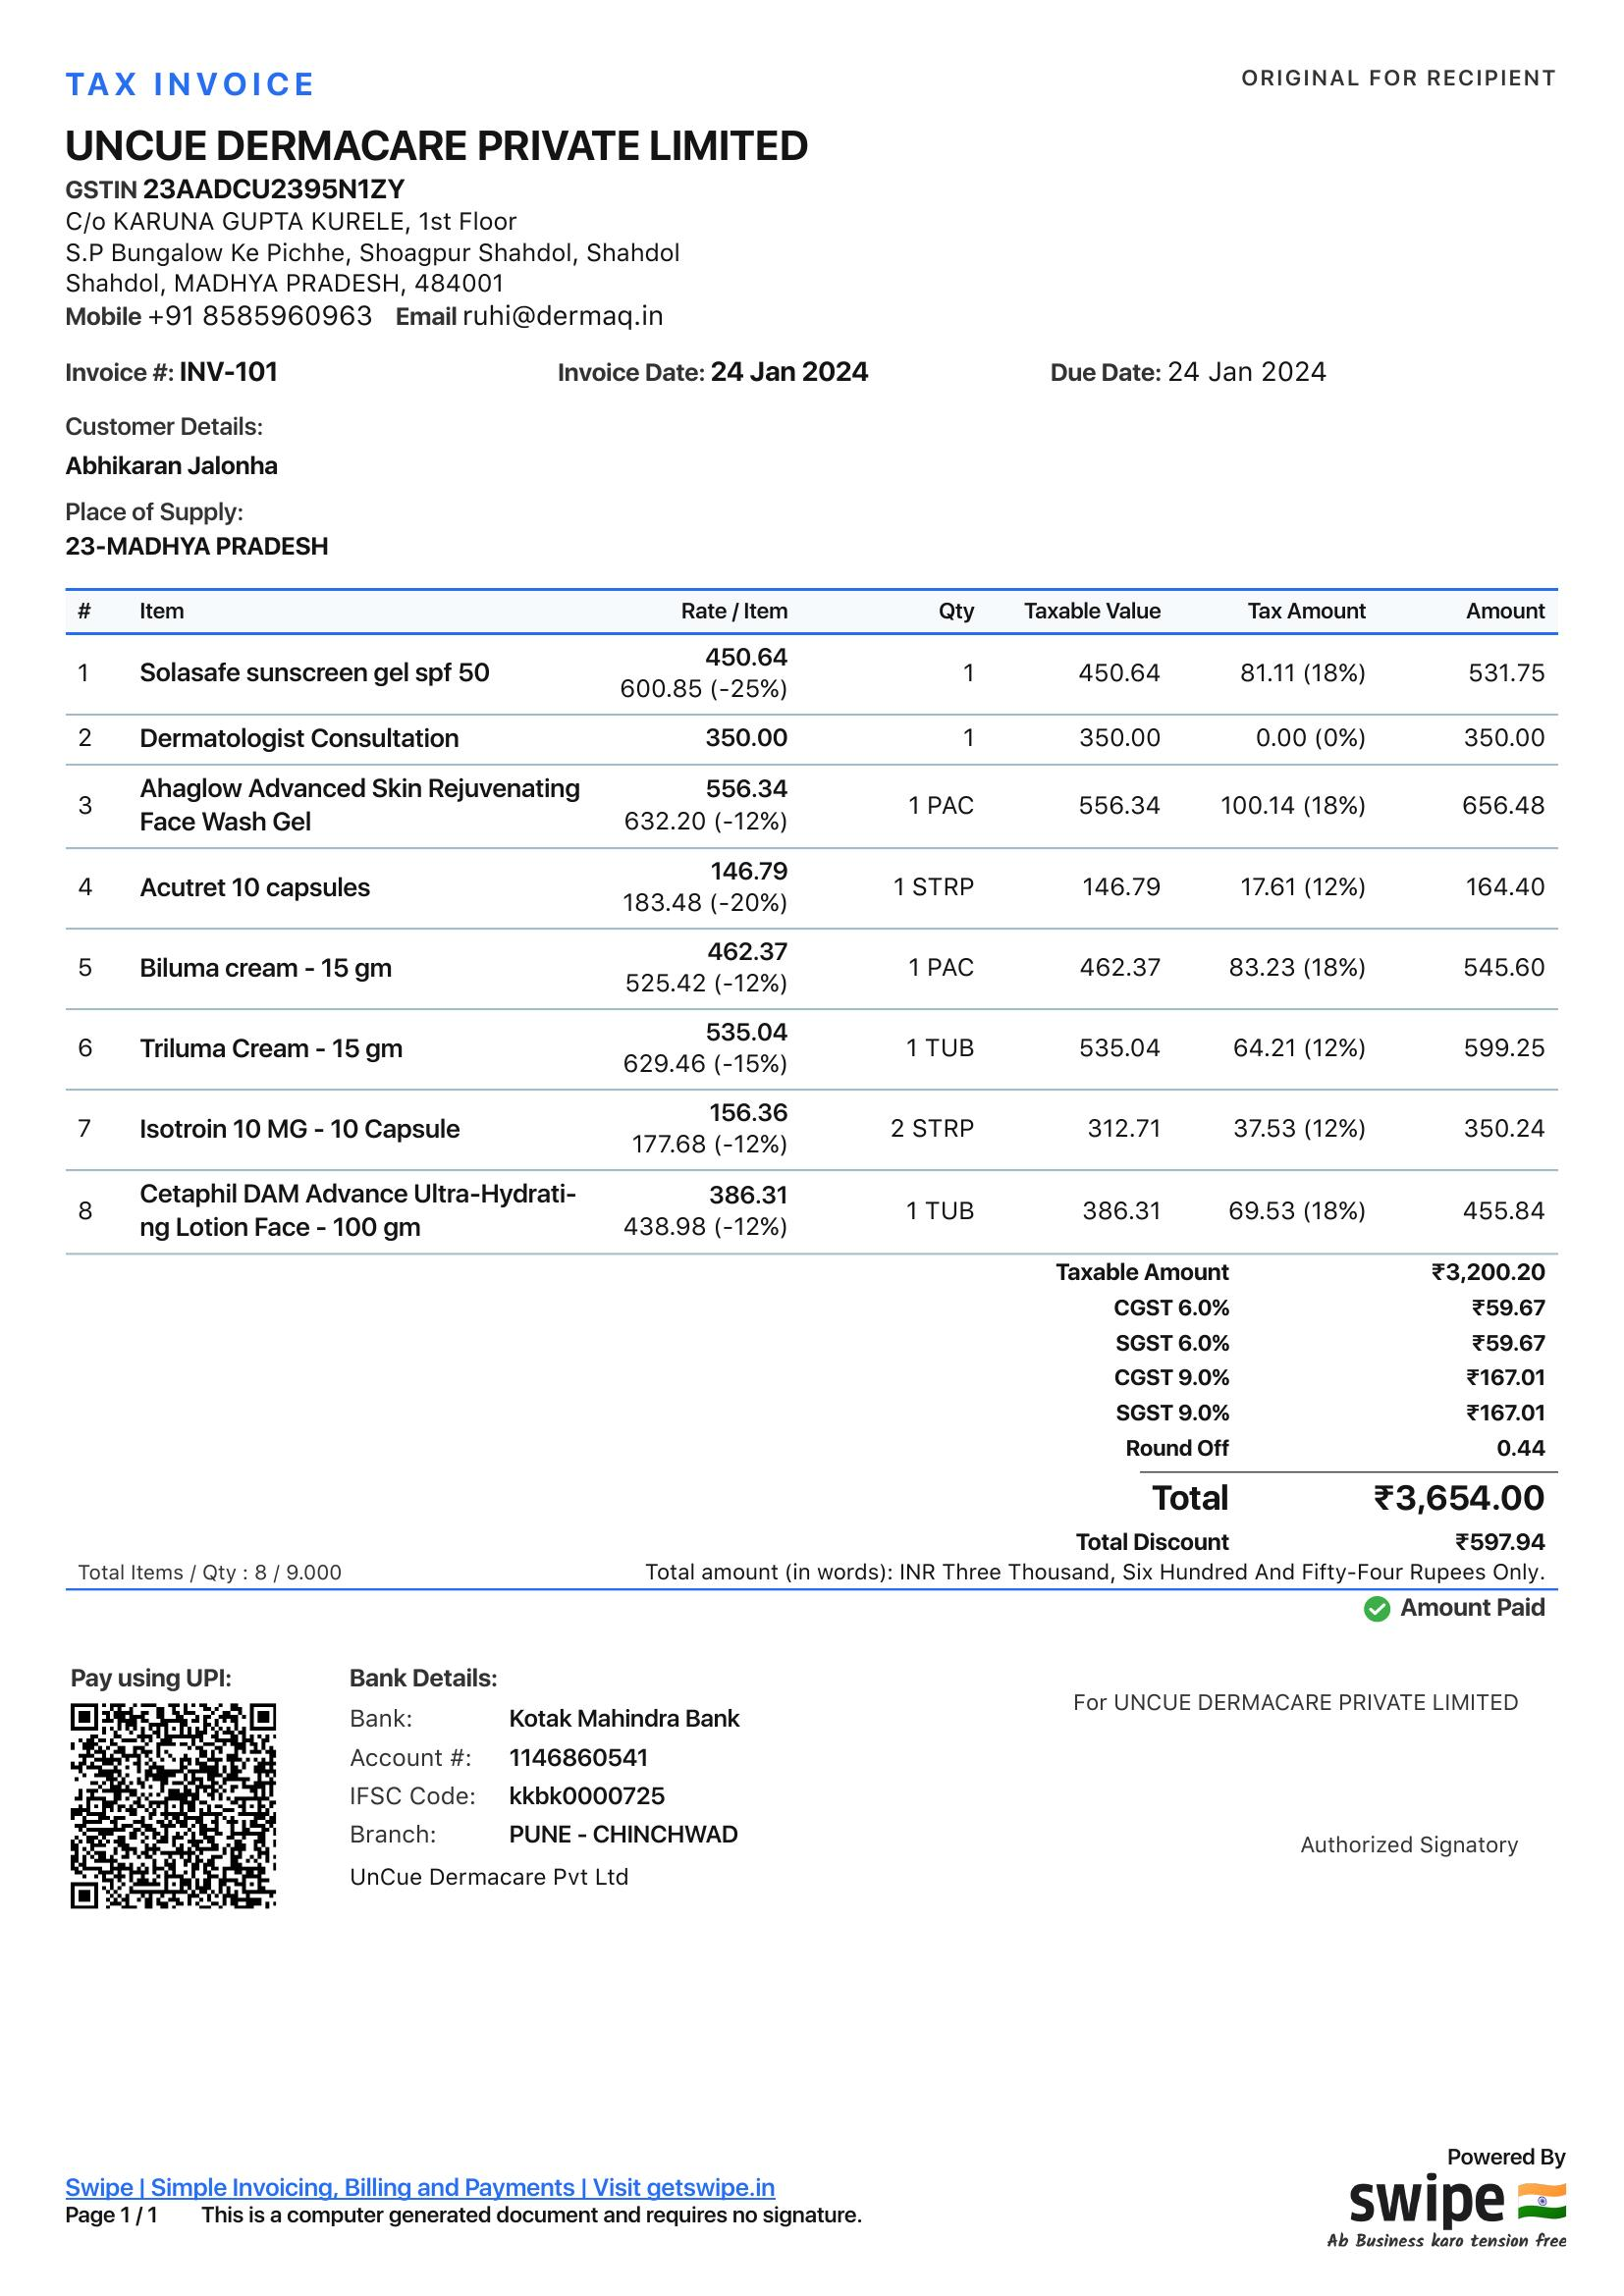

In [6]:
example = dataset["train"][4]
example["image"]

In [7]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
import numpy as np
from datasets.features import ClassLabel

return_entity_level_metrics = False

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image"
text_column_name = "tokens"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list


def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]
    
def prepare_examples(examples):
    images = examples[image_column_name]
    words = examples[text_column_name]
    boxes = examples[boxes_column_name]
    word_labels = examples[label_column_name]

    encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

    return encoding


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:

        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }
      
      
if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names

    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [9]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(feature=Value(dtype='int64')),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

Map:   0%|          | 0/9 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

In [10]:
# from datasets import load_metric
import evaluate

metric = evaluate.load("seqeval")

In [11]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test",
                                  max_steps=1000,
                                  per_device_train_batch_size=2,
                                  per_device_eval_batch_size=2,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1")

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [13]:
from transformers.data.data_collator import default_data_collator

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

max_steps is given, it will override any value given in num_train_epochs


In [14]:
import os
os.environ['WANDB_DISABLED'] = 'true'
import wandb
wandb.init(mode='disabled')

In [15]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: invoice_no seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: invoice_date seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: due_date seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: total_amount seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: item seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metric

TrainOutput(global_step=1000, training_loss=0.021954177588224412, metrics={'train_runtime': 580.9741, 'train_samples_per_second': 6.885, 'train_steps_per_second': 1.721, 'total_flos': 791072545572864.0, 'train_loss': 0.021954177588224412, 'epoch': 333.3333333333333})

In [16]:
trainer.evaluate()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: invoice_no seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: invoice_date seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: due_date seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: total_amount seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: item seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.10/site-packages/seqeval/metric

{'eval_loss': 0.011975730769336224,
 'eval_precision': 0.9210526315789473,
 'eval_recall': 0.9722222222222222,
 'eval_f1': 0.9459459459459458,
 'eval_accuracy': 0.9945504087193461,
 'eval_runtime': 0.6967,
 'eval_samples_per_second': 8.612,
 'eval_steps_per_second': 2.871,
 'epoch': 333.3333333333333}

In [17]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("/kaggle/working/test/checkpoint-1000")

In [73]:
example = dataset["test"][0]
image = example["image"]
words = example["tokens"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

input_ids torch.Size([1, 153])
attention_mask torch.Size([1, 153])
bbox torch.Size([1, 153, 4])
labels torch.Size([1, 153])
pixel_values torch.Size([1, 3, 224, 224])


In [74]:
import torch

with torch.no_grad():
    outputs = model(**encoding)

logits = outputs.logits
predictions = logits.argmax(-1).squeeze().tolist()
labels = encoding.labels.squeeze().tolist()

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]


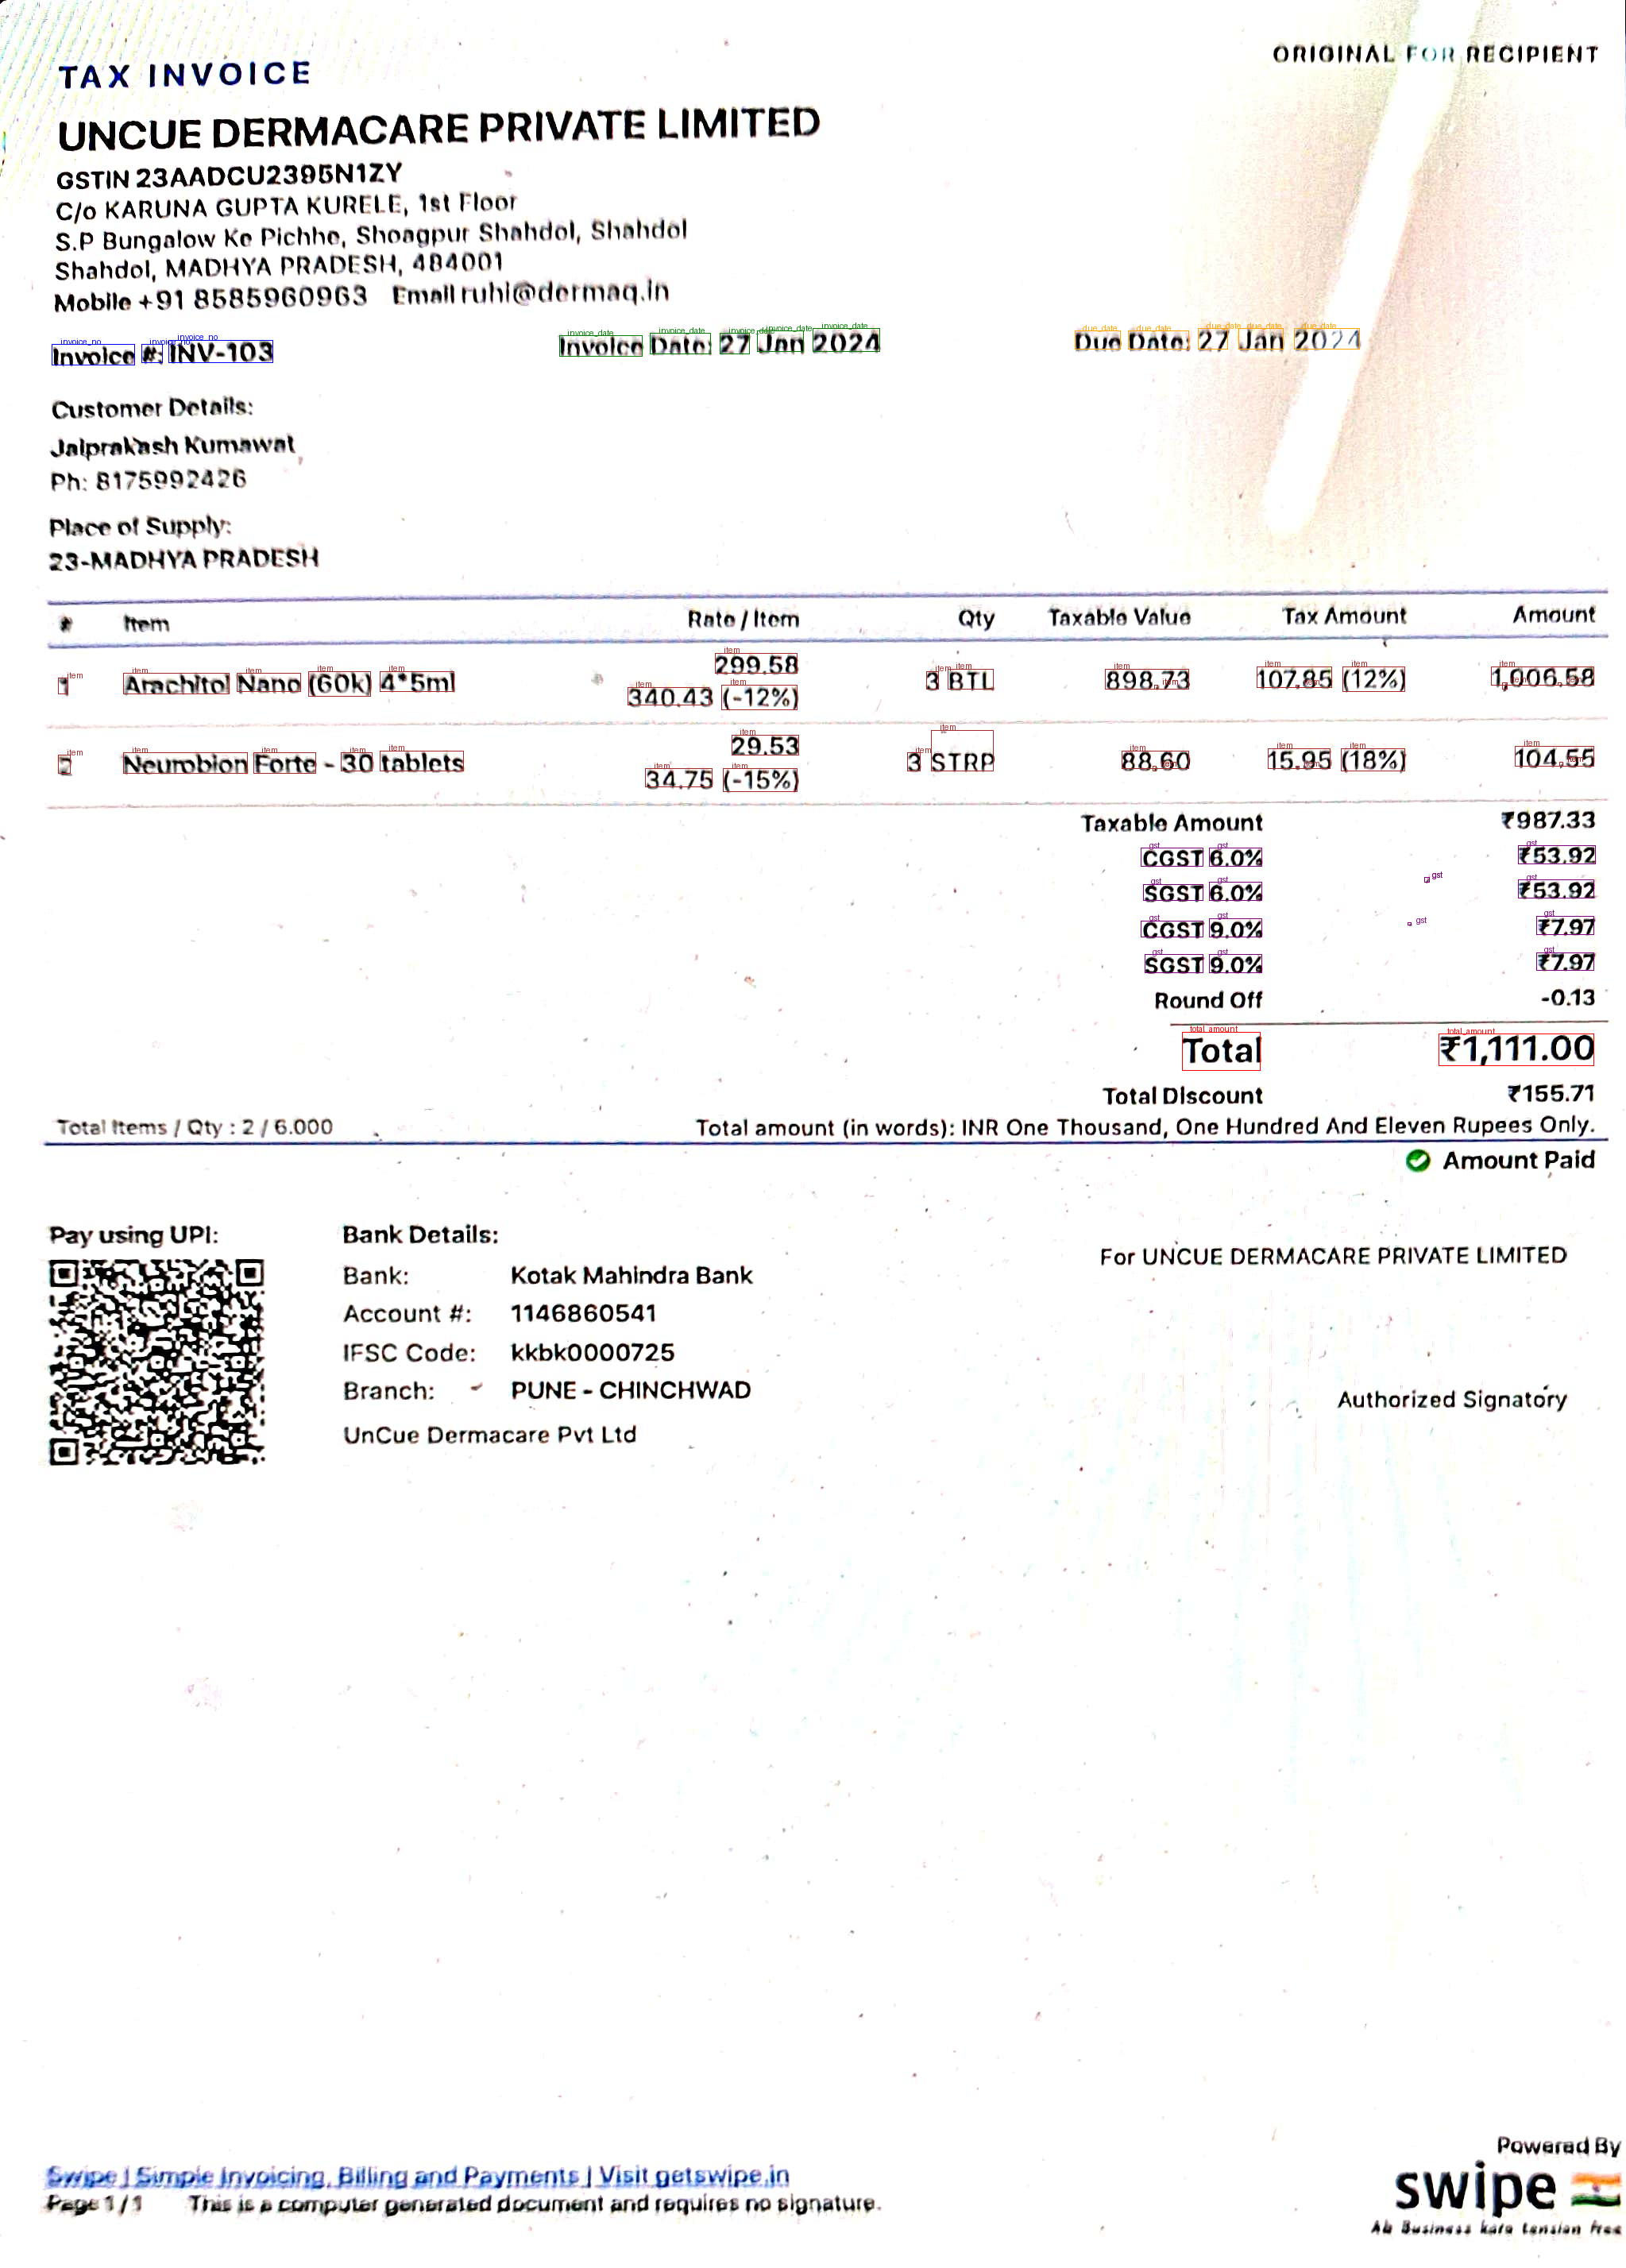

In [75]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label
    if not label:
      return 'other'
    return label

label2color = {'invoice_no':'blue', 'invoice_date':'green', 'due_date':'orange', 'total_amount':'red', 'item':'brown', 'gst':'purple'}

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

In [76]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
printed_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

pixel_values = printed_processor(images=image, return_tensors="pt").pixel_values

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [77]:
from PIL import Image, ImageDraw, ImageFont
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

printed_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

extracted_data = {label: [] for label in set(true_predictions)}

def iob_to_label(label):
    if not label:
        return 'other'
    return label

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()

    cropped_image = image.crop(box)

    pixel_values = printed_processor(images=cropped_image, return_tensors="pt").pixel_values
    generated_ids = printed_model.generate(pixel_values)
    generated_text = printed_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    extracted_data[predicted_label].append({
        "image": cropped_image, 
        "text": generated_text
    })

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The channel dimension is ambiguous. Got image shape (3, 5, 3). Assuming channels are the first dimension.
The channel dimension is ambiguous. Got image shape (3, 4, 3). Assuming channels are the first dimension.
The channel dimension is ambiguous. Got image shape (3, 5, 3). Assuming channels are the first dimension.
The channel dimension is ambiguous. Got image shape (3, 4, 3). Assuming channels are the first dimension.


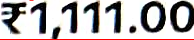

In [78]:
extracted_data['total_amount'][1]['image']

In [79]:
extracted_data['total_amount'][1]['text'].lower()

't1,111.00'

In [80]:
extracted_data

{'due_date': [{'image': <PIL.Image.Image image mode=RGB size=57x23>,
   'text': 'DUG'},
  {'image': <PIL.Image.Image image mode=RGB size=75x23>, 'text': 'DATE:'},
  {'image': <PIL.Image.Image image mode=RGB size=36x26>, 'text': '27'},
  {'image': <PIL.Image.Image image mode=RGB size=55x26>, 'text': 'JAN'},
  {'image': <PIL.Image.Image image mode=RGB size=82x26>, 'text': '2024'}],
 'total_amount': [{'image': <PIL.Image.Image image mode=RGB size=98x49>,
   'text': 'TOTAL'},
  {'image': <PIL.Image.Image image mode=RGB size=194x40>,
   'text': 'T1,111.00'}],
 'item': [{'image': <PIL.Image.Image image mode=RGB size=12x20>, 'text': '1'},
  {'image': <PIL.Image.Image image mode=RGB size=133x26>, 'text': 'ARACHITOL'},
  {'image': <PIL.Image.Image image mode=RGB size=80x23>, 'text': 'NANO'},
  {'image': <PIL.Image.Image image mode=RGB size=78x31>, 'text': '(60K)'},
  {'image': <PIL.Image.Image image mode=RGB size=92x26>, 'text': '4*5ML'},
  {'image': <PIL.Image.Image image mode=RGB size=102x26>

/tmp/ipykernel_30/3875701622.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, n, i + 1)


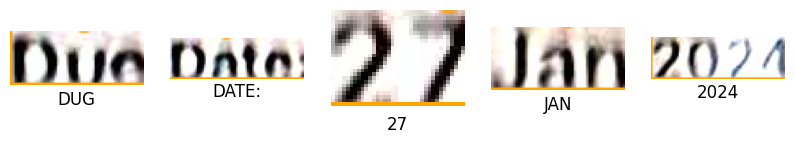

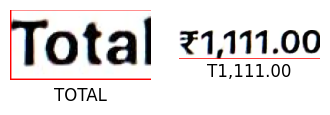

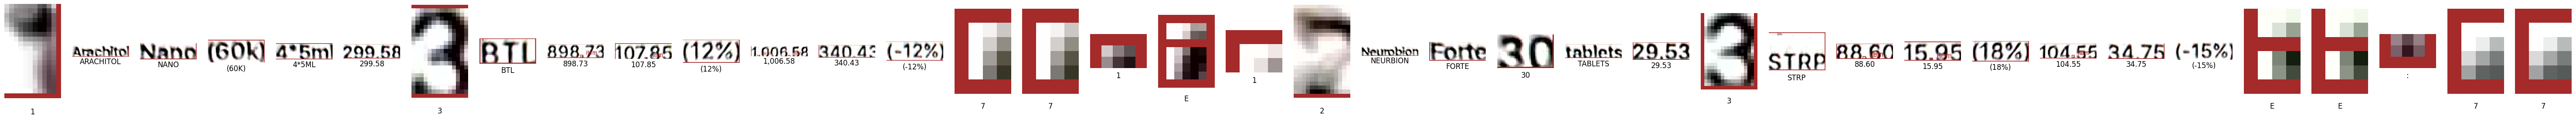

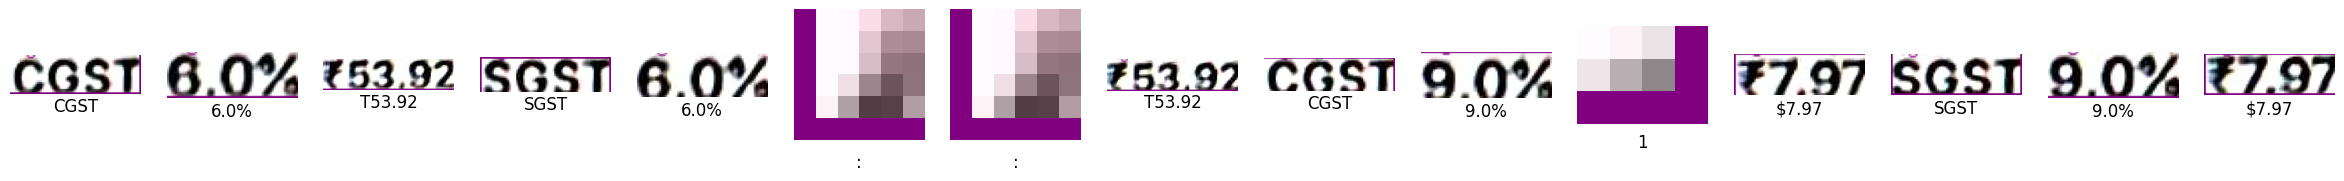

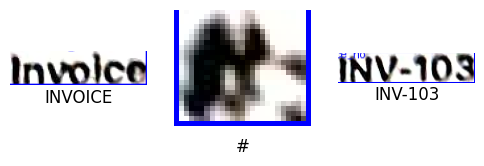

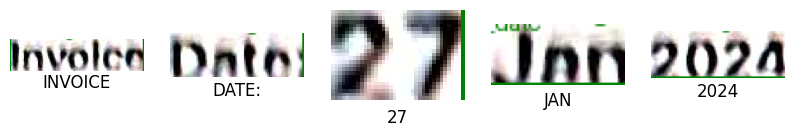

In [81]:
import matplotlib.pyplot as plt

def plot_section(title, data):
    n = len(data)
    plt.figure(figsize=(2 * n, 4))
    plt.title(title)

    for i, item in enumerate(data):
        ax = plt.subplot(1, n, i + 1)
        ax.axis('off')
        if item['image'] is not None and item['image'].size[0] > 0 and item['image'].size[1] > 0:
            ax.imshow(item['image']) 
        
        ax.text(0.5, -0.1, item['text'], fontsize=12, ha='center', va='top', transform=ax.transAxes)

    plt.show()

for section, items in extracted_data.items():
    plot_section(section.replace('_', ' ').title(), items)


/tmp/ipykernel_30/1240940941.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(n_rows, max_items_per_row, i + 1)  # Create subplots for rows and columns


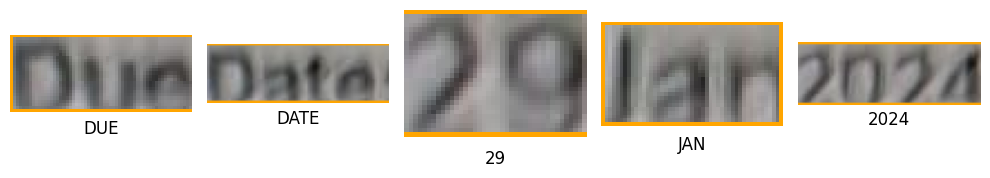

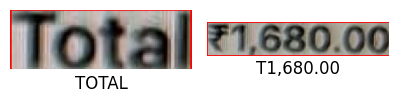

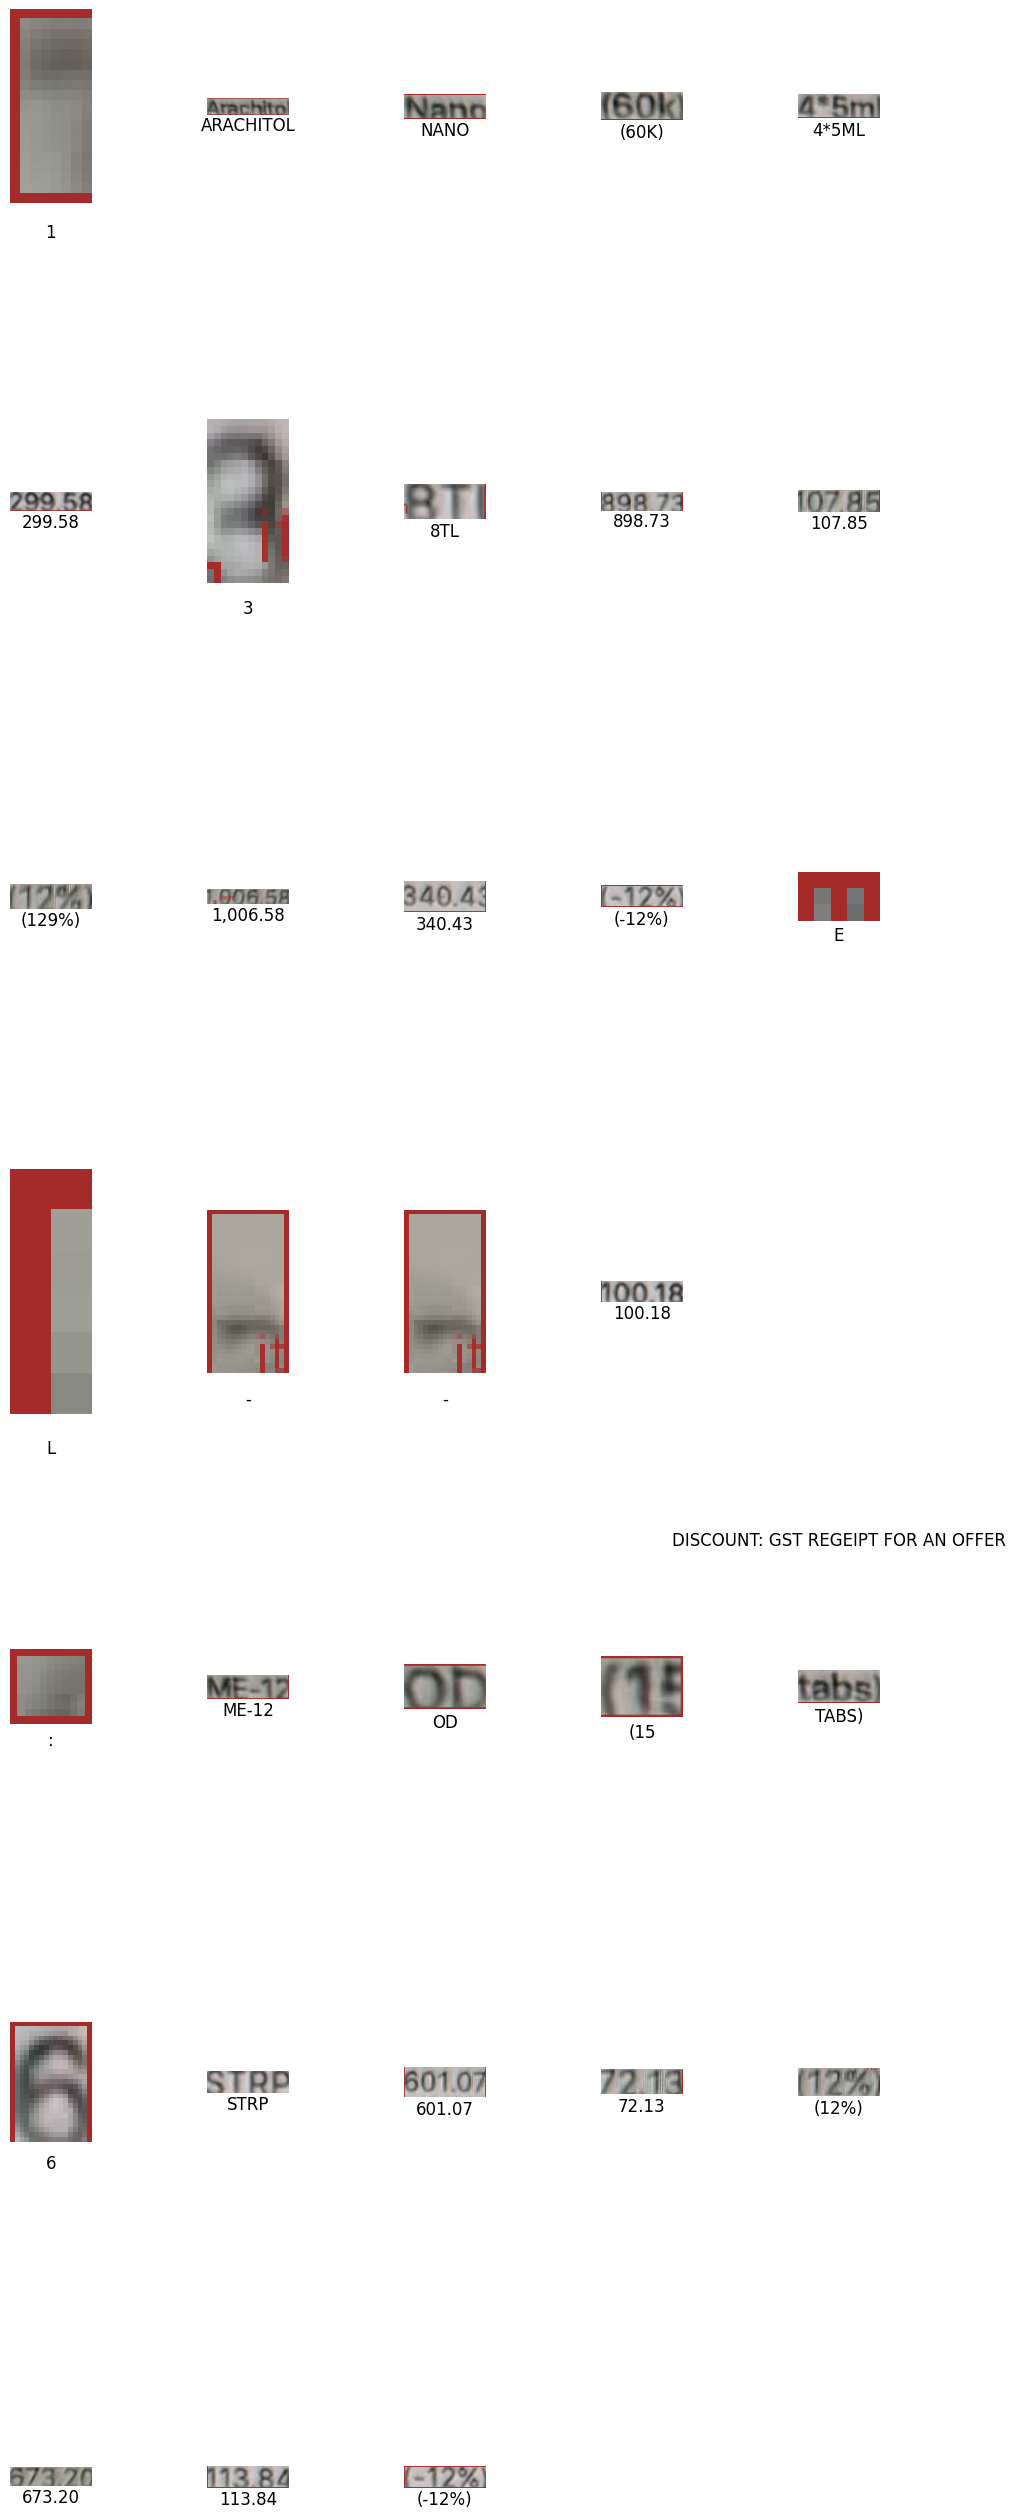

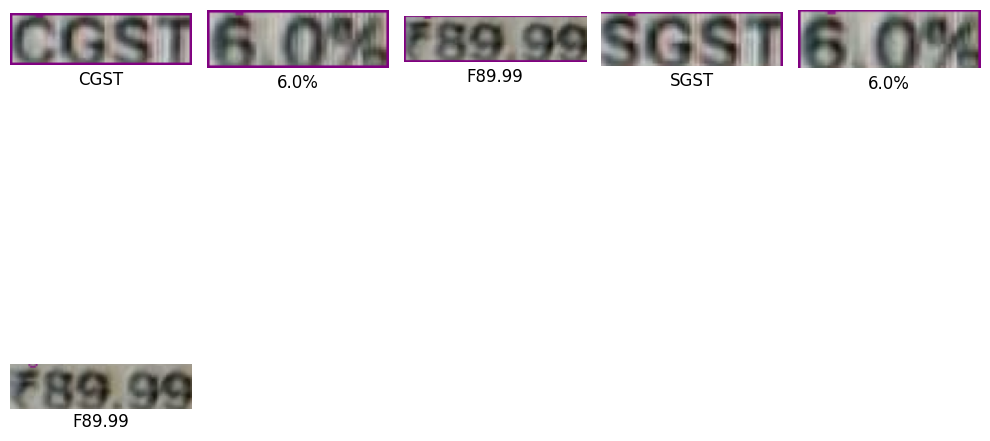

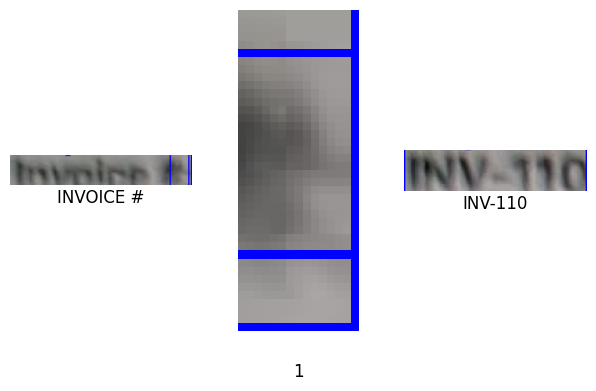

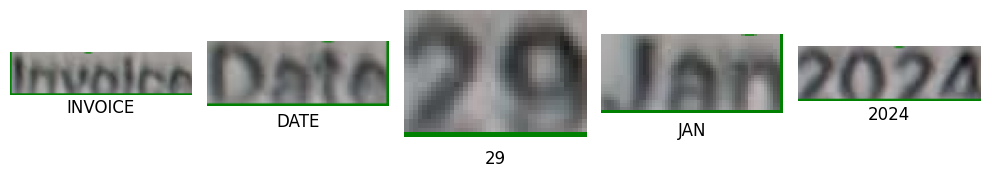

In [42]:
import matplotlib.pyplot as plt
import math

def plot_section(title, data):
    n = len(data)
    max_items_per_row = 5 
    n_rows = math.ceil(n / max_items_per_row) 

    plt.figure(figsize=(2 * max_items_per_row, 4 * n_rows))  
    plt.title(title)


    for i, item in enumerate(data):
        ax = plt.subplot(n_rows, max_items_per_row, i + 1)  
        ax.axis('off')
        if item['image'] is not None and item['image'].size[0] > 0 and item['image'].size[1] > 0:
            ax.imshow(item['image']) 
        
        
        ax.text(0.5, -0.1, item['text'], fontsize=12, ha='center', va='top', transform=ax.transAxes)

    plt.subplots_adjust(hspace=0.3)  
    plt.tight_layout() 
    plt.show()

 
for section, items in extracted_data.items():
    plot_section(section.replace('_', ' ').title(), items)
